In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.float_format" , lambda x : "%.4f" % x)
pd.set_option("display.width" , 200)

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
path= "/Users/gokhanersoz/Desktop/VBO_Dataset/online_retail_II.xlsx"

In [5]:
online_retail = pd.read_excel(path ,sheet_name = "Year 2010-2011")

# Mission 1:

### Understanding and Preparing Data

### 1. Read the 2010-2011 data in the OnlineRetail II excel. Make a copy of the dataframe you created. 

In [6]:
df = online_retail.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [7]:
df.ndim

2

### 2. Examine the descriptive statistics of the dataset.

In [8]:
def check_dataframe(dataframe, head = 5 , tail = 5):
    
    print(" head ".upper().center(50,"#"),end="\n\n")
    print(dataframe.head(head),end="\n\n")
    
    print(" tail ".upper().center(50,"#"),end="\n\n")
    print(dataframe.tail(tail),end="\n\n")
     
    print(" ndim ".upper().center(50,"#"),end="\n\n")
    print(f"{dataframe.ndim} Dimension",end="\n\n")
          
    print(" dtypes ".upper().center(50,"#"),end="\n\n")
    print(dataframe.dtypes,end="\n\n")
          
    print(" ınfo ".upper().center(50,"#"),end="\n\n")
    print(dataframe.info(),end="\n\n")
          
    print(" na ".upper().center(50,"#"),end="\n\n")
    print(dataframe.isnull().sum(),end="\n\n")
          
    print(" describe ".upper().center(50,"#"),end="\n\n")
    print(dataframe.describe([0.01,0.99]).T)

In [9]:
check_dataframe(df)

###################### HEAD ######################

  Invoice StockCode                          Description  Quantity         InvoiceDate  Price  Customer ID         Country
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6 2010-12-01 08:26:00 2.5500   17850.0000  United Kingdom
1  536365     71053                  WHITE METAL LANTERN         6 2010-12-01 08:26:00 3.3900   17850.0000  United Kingdom
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8 2010-12-01 08:26:00 2.7500   17850.0000  United Kingdom
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6 2010-12-01 08:26:00 3.3900   17850.0000  United Kingdom
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6 2010-12-01 08:26:00 3.3900   17850.0000  United Kingdom

###################### TAIL ######################

       Invoice StockCode                      Description  Quantity         InvoiceDate   Price  Customer ID Country
541905  581587     22899     CHILDREN'S 

### 3. Are there any missing observations in the dataset? If yes, how many missing observations in each variable?

In [10]:
na = df.isnull().sum()
na = pd.DataFrame(na[na>0], columns = ["NA Values"]).T
na_names = na.columns
na

,Description,Customer ID
NA Values,1454,135080


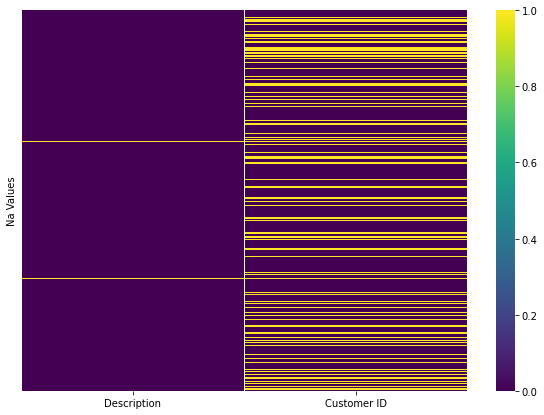

In [11]:
plt.figure(figsize = (10,7))
data = df.isnull()[na_names]

sns.heatmap(data = data , cmap = "viridis",yticklabels=False)
plt.ylabel("Na Values")
plt.show()

### 4. Remove the missing observations from the data set. Use the 'inplace=True' parameter for removal.

In [12]:
df.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
Quantity,541910.0000,9.5522,218.0810,-80995.0000,-2.0000,3.0000,100.0000,80995.0000
Price,541910.0000,4.6111,96.7598,-11062.0600,0.1900,2.0800,18.0000,38970.0000
Customer ID,406830.0000,15287.6842,1713.6031,12346.0000,12415.0000,15152.0000,18212.0000,18287.0000


In [13]:
df.dropna(inplace = True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [14]:
df.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
Quantity,406830.0000,12.0613,248.6931,-80995.0000,-2.0000,5.0000,120.0000,80995.0000
Price,406830.0000,3.4605,69.3151,0.0000,0.2100,1.9500,15.0000,38970.0000
Customer ID,406830.0000,15287.6842,1713.6031,12346.0000,12415.0000,15152.0000,18212.0000,18287.0000


### 5. How many unique items are there?

In [15]:
for col in df.columns :
    print(f"For {col.upper()} Nunique Values : {df[col].nunique()}",end = "\n\n")

For INVOICE Nunique Values : 22190

For STOCKCODE Nunique Values : 3684

For DESCRIPTION Nunique Values : 3896

For QUANTITY Nunique Values : 436

For INVOICEDATE Nunique Values : 20460

For PRICE Nunique Values : 620

For CUSTOMER ID Nunique Values : 4372

For COUNTRY Nunique Values : 37



In [16]:
# Target Values

items = "StockCode"
print(f"For {items.upper()} Nunique Values : {df[items].nunique()}")

For STOCKCODE Nunique Values : 3684


### 6. How many of each product are there?

In [17]:
target = df[items].value_counts()
target = pd.DataFrame(target).reset_index()
target.columns = ["StockCode", "Values"]
target.head(10)

,StockCode,Values
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416
5,20725,1359
6,22720,1232
7,POST,1197
8,20727,1126
9,22197,1118


### 7. Sort the 5 most ordered products from most to least.

In [18]:
five_values = df.groupby(["StockCode"])[["Quantity"]].sum().sort_values(by = "Quantity" , ascending = False)
five_values.head()

,Quantity
StockCode,
84077,53215
22197,48712
85099B,45066
84879,35314
85123A,34204


In [19]:
target.sort_values(by ="Values" , ascending = False).head()

,StockCode,Values
0,85123A,2077
1,22423,1905
2,85099B,1662
3,84879,1418
4,47566,1416


### 8. The 'C' in the invoices shows the canceled transactions. Remove the canceled transactions from the data set.

In [20]:
print(f"DataFrame Shape : {df.shape}")

DataFrame Shape : (406830, 8)


In [21]:
df["Invoice"].str.contains("C", na = None).head(3)

0    NaN
1    NaN
2    NaN
Name: Invoice, dtype: object

In [22]:
df["Invoice"].str.contains("C" , na = False).head(3)

0    False
1    False
2    False
Name: Invoice, dtype: bool

In [23]:
# The reason we set na = False would normally return None if na = None. 
# We fill them with False instead, which we convert to True with "~" and catch them.

df = df[~df["Invoice"].str.contains("C", na = False )]
print(f"DataFrame Shape : {df.shape}")

DataFrame Shape : (397925, 8)


### 9. Create a variable named 'Total Price' that represents the total earnings per invoice.

In [24]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom


In [25]:
df["TotalPrice"] = df["Quantity"] * df["Price"]
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,17850.0000,United Kingdom,15.3000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,17850.0000,United Kingdom,22.0000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,17850.0000,United Kingdom,20.3400


## Mission 2:

## Calculation of RFM metrics

▪ Make the definitions of Recency, Frequency and Monetary.

▪ Customer specific Recency, Frequency and Monetary metrics with groupby, agg and lambda
calculate.

▪ Assign your calculated metrics to a variable named rfm.

▪ Change the names of the metrics you created to recency, frequency and monetary.

Note 1: For the recency value, accept today's date as (2011, 12, 11).

Note 2: After creating the rfm dataframe, filter the dataset to "monetary>0".

In [26]:
df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [27]:
# We looked at a max value and added 2 days on top of it....

import datetime
today_date = datetime.datetime(2011,12,11)
today_date

datetime.datetime(2011, 12, 11, 0, 0)

In [28]:
rfm = df.groupby("Customer ID").agg({"InvoiceDate" : lambda InvoiceDate : (today_date - InvoiceDate.max()).days,
                                    "Invoice" : lambda Invoice : Invoice.nunique(),
                                    "TotalPrice" : lambda TotalPrice : TotalPrice.sum()})

In [29]:
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0000,326,1,77183.6000
12347.0000,3,7,4310.0000
12348.0000,76,4,1797.2400
12349.0000,19,1,1757.5500
12350.0000,311,1,334.4000


In [30]:
# Control 

values = 12346.0000

print("Invoice : " , df[df["Customer ID"] == values]["Invoice"].nunique(),end = "\n\n")

print("InvoiceDate : " , (today_date - df[df["Customer ID"] == values]["InvoiceDate"].max()).days,end="\n\n")

print("TotalPrice : " , df[df["Customer ID"] == values]["TotalPrice"].sum(),end = "\n\n")

Invoice :  1

InvoiceDate :  326

TotalPrice :  77183.6



In [31]:
rfm.columns = ["Recency", "Frequence", "Monetary"]
rfm.head()

,Recency,Frequence,Monetary
Customer ID,,,
12346.0000,326,1,77183.6000
12347.0000,3,7,4310.0000
12348.0000,76,4,1797.2400
12349.0000,19,1,1757.5500
12350.0000,311,1,334.4000


In [32]:
#We caught the min value of the monetary value as 0 here, we need to fix it...
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4339.0000,93.0415,100.0078,1.0000,18.0000,51.0000,142.5000,374.0000
Frequence,4339.0000,4.2720,7.7055,1.0000,1.0000,2.0000,5.0000,210.0000
Monetary,4339.0000,2053.7972,8988.2478,0.0000,307.2450,674.4500,1661.6400,280206.0200


In [33]:
rfm = rfm[rfm["Monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,4338.0000,93.0595,100.0123,1.0000,18.0000,51.0000,142.7500,374.0000
Frequence,4338.0000,4.2727,7.7062,1.0000,1.0000,2.0000,5.0000,210.0000
Monetary,4338.0000,2054.2706,8989.2299,3.7500,307.4150,674.4850,1661.7400,280206.0200


## Mission 3:
### Generating and converting RFM scores to a single variable

▪ Convert Recency, Frequency and Monetary metrics to scores between 1-5 with the help of qcut.

▪ Record these scores as recency_score, frequency_score and monetary_score.

▪ Express recency_score and frequency_score as a single variable and save as RFM_SCORE.

CAUTION! We do not include monetary_score.

In [34]:
# If we pay attention to the frequency here, the same values appear in different quarters 
#and this will cause a problem, so we will use rank(method = "first")

values = [.1, .2, .3, .4, .5, .6, .7, .8, .9]
rfm.describe(values).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Recency,4338.0000,93.0595,100.0123,1.0000,6.0000,13.8000,23.0000,33.0000,51.0000,72.0000,109.0000,180.0000,263.3000,374.0000
Frequence,4338.0000,4.2727,7.7062,1.0000,1.0000,1.0000,1.0000,2.0000,2.0000,3.0000,4.0000,6.0000,9.0000,210.0000
Monetary,4338.0000,2054.2706,8989.2299,3.7500,156.6990,250.1940,351.7720,490.0960,674.4850,942.2760,1353.7400,2058.4260,3646.5310,280206.0200


In [35]:
# For the Recency value, the scoring should be in reverse, the lowest value being the highest
# [(0.999, 13.8] < (13.8, 33.0] < (33.0, 72.0] < (72.0, 180.0] < (180.0, 374.0]] ranges

rfm["Recency_Score"] = pd.qcut(rfm.Recency, 5, labels = [5,4,3,2,1])

In [36]:
pd.DataFrame(rfm.Frequence.rank(method="first").describe(values)).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Frequence,4338.0000,2169.5000,1252.4171,1.0000,434.7000,868.4000,1302.1000,1735.8000,2169.5000,2603.2000,3036.9000,3470.6000,3904.3000,4338.0000


In [37]:
# We will use the rank method for the frequency value as it captures the same values in different quarters

# Note: We don't need to take it backwards here, anyway, the biggest area gets the highest score...

# [(0.999, 868.4] < (868.4, 1735.8] < (1735.8, 2603.2] < (2603.2, 3470.6] < (3470.6, 4338.0]] ranges

rfm["Frequence_Score"] = pd.qcut(rfm.Frequence.rank(method="first"), 5 , labels = [1,2,3,4,5])

In [38]:
# The one with the highest Monetary value has the highest score...

#[(3.749, 250.194] < (250.194, 490.096] < (490.096, 942.276] <(942.276, 2058.426] <(2058.426, 280206.02]] ranges

rfm["Monetary_Score"] = pd.qcut(rfm.Monetary, 5 , labels = [1,2,3,4,5])

In [39]:
rfm.head()

,Recency,Frequence,Monetary,Recency_Score,Frequence_Score,Monetary_Score
Customer ID,,,,,,
12346.0000,326,1,77183.6000,1,1,5
12347.0000,3,7,4310.0000,5,5,5
12348.0000,76,4,1797.2400,2,4,4
12349.0000,19,1,1757.5500,4,1,4
12350.0000,311,1,334.4000,1,1,2


In [40]:
rfm["RFM_SCORE"] = rfm["Recency_Score"].astype(str) + rfm["Frequence_Score"].astype(str)
rfm.head()

,Recency,Frequence,Monetary,Recency_Score,Frequence_Score,Monetary_Score,RFM_SCORE
Customer ID,,,,,,,
12346.0000,326,1,77183.6000,1,1,5,11
12347.0000,3,7,4310.0000,5,5,5,55
12348.0000,76,4,1797.2400,2,4,4,24
12349.0000,19,1,1757.5500,4,1,4,41
12350.0000,311,1,334.4000,1,1,2,11


In [41]:
# Champions

rfm[rfm["RFM_SCORE"] == "55"]["RFM_SCORE"].count()

439

In [42]:
# Hiberneating

rfm[rfm["RFM_SCORE"] == "11"]["RFM_SCORE"].count()

362

## Mission 4:

### Defining RFM scores as segments

▪ Make segment definitions so that the generated RFM scores can be explained more clearly.

▪ Convert the scores into segments with the help of the seg_map below.

In [43]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [44]:
# Here, when the regex is False, it does not detect [1-2][1-2] values, only 33,41,51 values.
# We make it detect all of them by making Regex True
rfm["Segment"] = rfm["RFM_SCORE"].replace(seg_map , regex = True)
rfm.head()

,Recency,Frequence,Monetary,Recency_Score,Frequence_Score,Monetary_Score,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0000,326,1,77183.6000,1,1,5,11,hibernating
12347.0000,3,7,4310.0000,5,5,5,55,champions
12348.0000,76,4,1797.2400,2,4,4,24,at_Risk
12349.0000,19,1,1757.5500,4,1,4,41,promising
12350.0000,311,1,334.4000,1,1,2,11,hibernating


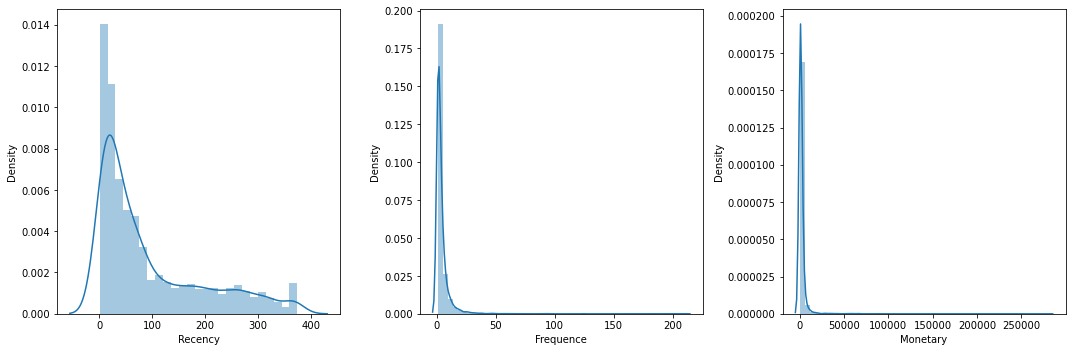

In [45]:
plt.figure(figsize = (15,5))
i = 1
for col in ["Recency","Frequence","Monetary"]:
    plt.subplot(1,3,i)
    sns.distplot(rfm[col])
    i+=1
    
plt.tight_layout()
plt.show()

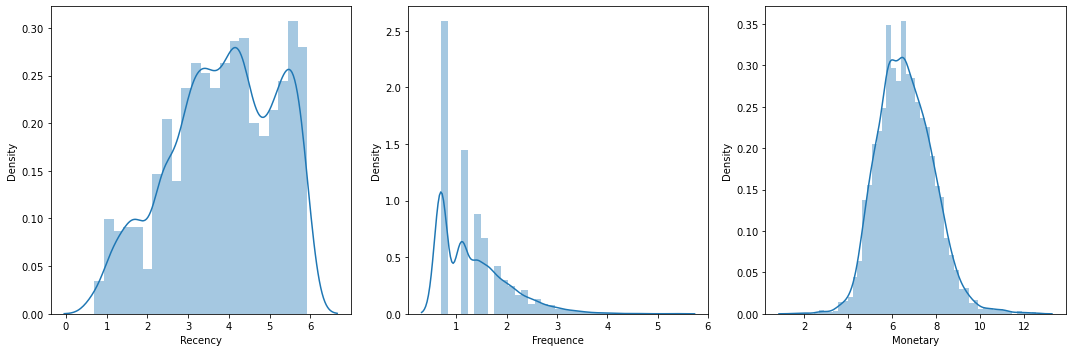

In [46]:
plt.figure(figsize = (15,5))
i = 1
for col in ["Recency","Frequence","Monetary"]:
    plt.subplot(1,3,i)
    sns.distplot(np.log1p(rfm[col]))
    i+=1
    
plt.tight_layout()
plt.show()

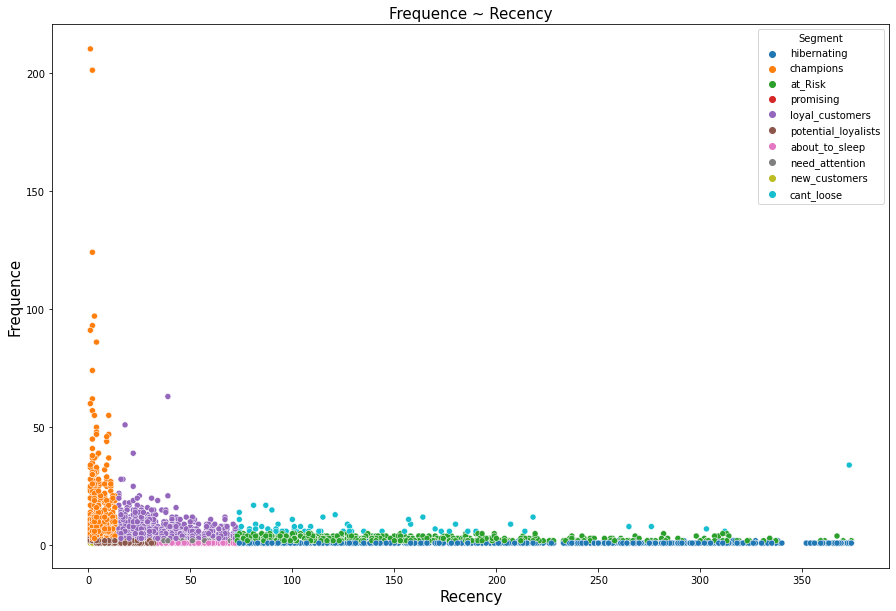

In [47]:
plt.figure(figsize = (15,10))

sns.scatterplot(x = rfm["Recency"], y = rfm["Frequence"] , hue=rfm["Segment"])

size = 15
plt.xlabel("Recency" , fontsize = size)
plt.ylabel("Frequence", fontsize = size)
plt.title("Frequence ~ Recency" ,fontsize = size)
plt.show()

### Mission 5:

### Time for action!

▪ Select the 3 segments you find important. These three segments;

     - Both in terms of action decisions,

     - Interpret both in terms of the structure of the segments (mean RFM values).

▪ Select the customer IDs of the "Loyal Customers" class and get the excel output.

In [48]:
segment_names = rfm["Segment"].unique().tolist()
for name in segment_names:
    print(f" For { name } Describe ".upper().center(50,"#"),end = "\n\n")
    
    print(pd.DataFrame(data = rfm[rfm["Segment"] == name].describe().T), end = "\n\n")

############ FOR HIBERNATING DESCRIBE ############

              count     mean       std     min      25%      50%      75%        max
Recency   1071.0000 217.6050   92.0136 73.0000 135.0000 219.0000 289.5000   374.0000
Frequence 1071.0000   1.1018    0.3025  1.0000   1.0000   1.0000   1.0000     2.0000
Monetary  1071.0000 488.6433 2419.6826  3.7500 155.1100 296.2500 457.9300 77183.6000

############# FOR CHAMPIONS DESCRIBE #############

             count      mean        std      min       25%       50%       75%         max
Recency   633.0000    6.3618     3.6833   1.0000    3.0000    5.0000   10.0000     13.0000
Frequence 633.0000   12.4171    16.4765   3.0000    5.0000    8.0000   14.0000    210.0000
Monetary  633.0000 6857.9639 20339.7638 201.1200 1451.2800 2612.9600 4954.8400 280206.0200

############## FOR AT_RISK DESCRIBE ##############

             count      mean       std     min      25%      50%       75%        max
Recency   593.0000  153.7858   68.6188 73.0000  96.0

In [49]:
segment = rfm["Segment"].value_counts()
segment = pd.DataFrame(segment).sort_values(by = "Segment" , ascending = False)
segment

,Segment
hibernating,1071
loyal_customers,819
champions,633
at_Risk,593
potential_loyalists,484
about_to_sleep,352
need_attention,187
promising,94
cant_loose,63
new_customers,42


In [50]:
rfm[["Segment","Frequence","Recency","Monetary"]].groupby("Segment").agg(["mean","count"])

Frequence        Recency        Monetary      
                         mean count     mean count      mean count
Segment                                                           
about_to_sleep         1.1619   352  53.3125   352  471.9944   352
at_Risk                2.8786   593 153.7858   593 1084.5353   593
cant_loose             8.3810    63 132.9683    63 2796.1559    63
champions             12.4171   633   6.3618   633 6857.9639   633
hibernating            1.1018  1071 217.6050  1071  488.6433  1071
loyal_customers        6.4799   819  33.6081   819 2864.2478   819
need_attention         2.3262   187  52.4278   187  897.6279   187
new_customers          1.0000    42   7.4286    42  388.2129    42
potential_loyalists    2.0103   484  17.3988   484 1041.2220   484
promising              1.0000    94  23.5106    94  294.0080    94

### Champions Class

* This class is the class that brings the most returns. He sees that he is logged in frequently according to his recency value. His Frequence value is higher than the others, which makes this class Champions. By creating more opportunities for them, we can increase their monetary value even more...

### Loyal Customers

* We can organize special campaigns to attract this class to the champions class and increase their returns to us more.

### Can't Loose

* These customers are more when we compare their frequencies with loyal customers, but the difference between them is very high, they are close to each other in terms of return, it may be a plus for us to be in contact with them so that they can visit more often in order not to keep them away. Campaigns can be organized according to what they are more interested in...

### Select the customer IDs of the "Loyal Customers" class and get the excel output.

In [51]:
loyal_customers = pd.DataFrame()
loyal_customers["Loyal_Customers_ID"] = rfm[rfm["Segment"] == "loyal_customers"].index
loyal_customers.to_excel("loyal_customers_id.xlsx")

In [52]:
print("Loyal Customers Shape : {}".format(loyal_customers.shape))

Loyal Customers Shape : (819, 1)


In [53]:
loyal_customers.head()

,Loyal_Customers_ID
0,12352.0000
1,12359.0000
2,12370.0000
3,12380.0000
4,12388.0000
